In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
data = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label' , 'message'])

In [3]:
data.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

In [5]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
frequency= data['label'].value_counts()
frequency

label
ham     4825
spam     747
Name: count, dtype: int64

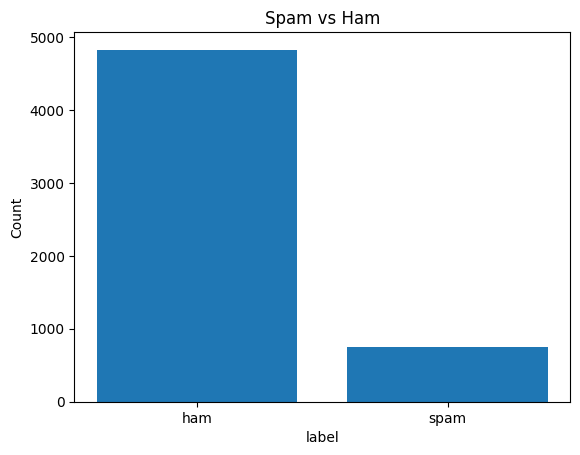

In [7]:
plt.bar(frequency.index , frequency.values)
plt.title('Spam vs Ham')
plt.xlabel('label')
plt.ylabel('Count')
plt.show()

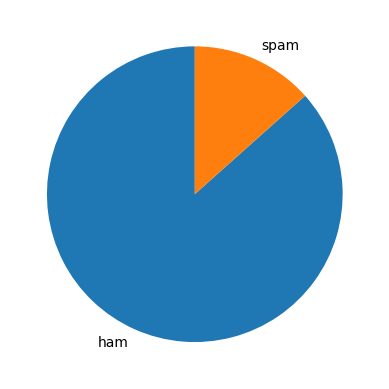

In [8]:
plt.pie(frequency.values, labels=frequency.index, startangle=90)
plt.show()

In [9]:
vectorizer =CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data['message'])

In [10]:
data['label'] = data['label'].map({'spam': 0, 'ham': 1})
y = data['label']
y



0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [13]:

y_predict = model.predict(X_test)
y_predict


array([1, 1, 1, ..., 1, 0, 1])

Accuracy: 98.09%
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       224
           1       0.99      0.98      0.99      1448

    accuracy                           0.98      1672
   macro avg       0.95      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



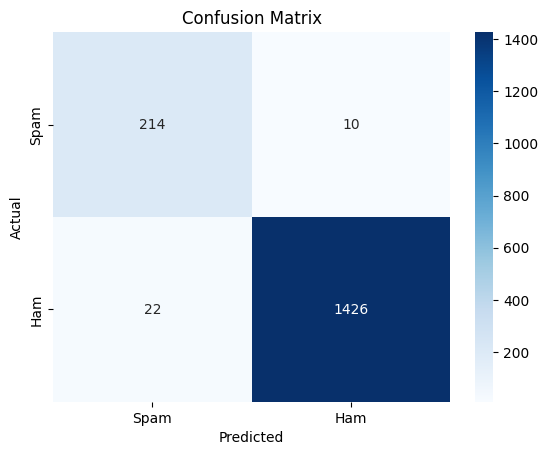

In [14]:
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy * 100:.2f}%')

print("Classification Report:")
print(classification_report(y_test, y_predict))

conf_matrix = confusion_matrix(y_test, y_predict)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Spam', 'Ham'], yticklabels=['Spam', 'Ham'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [15]:
def classify_sms(input_sms):
    input_data = [input_sms]  
    input_vector = vectorizer.transform(input_data) 
    prediction = model.predict(input_vector)  
    
    if prediction == 0:
        return "This is a Spam SMS."
    else:
        return "This is a Ham  SMS."



In [16]:
input_sms = input("Enter an SMS message to classify: ")
print(classify_sms(input_sms))

Enter an SMS message to classify:  ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..


This is a Ham  SMS.


In [17]:
def classify_sms(input_sms):
    input_data=[input_sms]
    input_vector=vectorizer.transform(input_data)
    prediction=model.predict(input_vector)

if prediction==0:
    return "Spam SMS"

else:
    return "Ham SMS"
    

SyntaxError: 'return' outside function (1793961565.py, line 7)